In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/fronted select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

mpl.rc('font', family='NanumGothic')

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
df1 = pd.read_csv('Data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [4]:
df1['datetime(timestamp)']=pd.to_datetime(df1['datetime'])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   51304 non-null  int64         
 1   type_of_contract     51300 non-null  object        
 2   type_of_contract2    51303 non-null  object        
 3   channel              51304 non-null  object        
 4   datetime             51304 non-null  object        
 5   Term                 51304 non-null  int64         
 6   payment_type         51304 non-null  object        
 7   product              51303 non-null  object        
 8   amount               51304 non-null  int64         
 9   state                51304 non-null  object        
 10  overdue_count        51304 non-null  int64         
 11  overdue              51302 non-null  object        
 12  credit rating        42521 non-null  float64       
 13  bank                 48544 non-

In [ ]:
sns.lineplot(data = df1, x='datetime(timestamp)', y='amount',ci =None, estimator=sum)

In [26]:
df1['요일']=df1['datetime(timestamp)'].dt.day_name()
day_name_list=df1['요일'].unique()
cond1 = df1['요일'] != 'Saturday'
df2 = df1.loc[cond1]

In [ ]:
pd.pivot_table(data = df1, index='요일', values ='amount')

In [ ]:
df2.head()

In [ ]:
pd.pivot_table(data = df2, index = '요일', values = 'amount')

In [ ]:
sns.lineplot(data = df2, x='datetime',y='amount',ci=None)

In [ ]:
sns.barplot(data = df2, x='요일',y='amount',ci=None, estimator = sum)

In [40]:
df1['주차']=df1['datetime(timestamp)'].dt.week

<ipython-input-40-8cda97eb4e8b>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['주차']=df1['datetime(timestamp)'].dt.week


<ipython-input-41-b1bbad68865a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='주차',y='amount', ci=None, estimator=sum)


<Axes: xlabel='주차', ylabel='amount'>

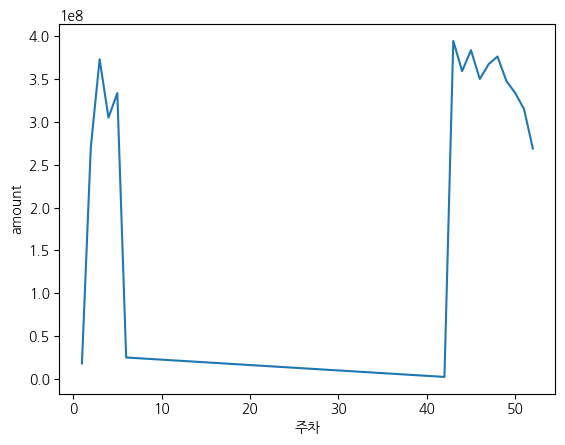

In [41]:
sns.lineplot(data=df1, x='주차',y='amount', ci=None, estimator=sum)

In [ ]:
sns.lineplot(data=df1, x='주차',y='amount', ci=None, estimator=sum)

In [42]:
df1['연도']=df1['datetime(timestamp)'].dt.year

<ipython-input-43-54568a12ab29>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df1,x='주차',y='amount',ci=None, estimator=sum,hue='연도')


<Axes: xlabel='주차', ylabel='amount'>

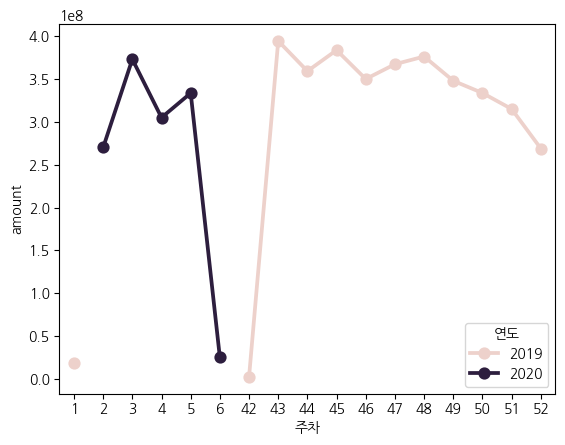

In [43]:
sns.pointplot(data=df1,x='주차',y='amount',ci=None, estimator=sum,hue='연도')

<ipython-input-44-82dc6ec86dc2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df3,x='주차',y='amount',ci=None, estimator=sum,hue='연도')


<Axes: xlabel='주차', ylabel='amount'>

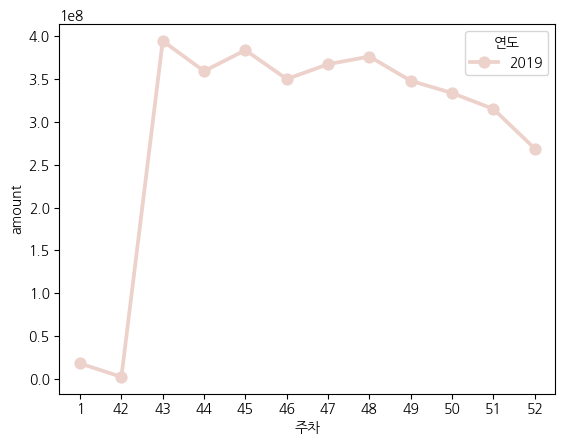

In [44]:
cond2 = (df1['연도']==2019)
df3 = df1.loc[cond2]
sns.pointplot(data=df3,x='주차',y='amount',ci=None, estimator=sum,hue='연도')